In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deepracer.tracks import TrackIO, Track

In [2]:
from deepracer.logs import CloudWatchLogs as cw, \
    SimulationLogsIO as slio, \
    AnalysisUtils as au, \
    PlottingUtils as pu

In [3]:
!ls tracks/

AmericasGeneratedInclStart.npy	New_York_Eval_Track.npy
AWS_track.npy			New_York_Track.npy
Bowtie_track.npy		Oval_track.npy
Canada_Eval.npy			reInvent2019_track.npy
Canada_Training.npy		reInvent2019_wide_mirrored.npy
China_eval_track.npy		reInvent2019_wide.npy
China_track.npy			reinvent_base.npy
H_track.npy			Spain_track.npy
LGSWide.npy			Straight_track.npy
London_Loop_Train.npy		Tokyo_Training_track.npy
Mexico_track_eval.npy		Vegas_track.npy
Mexico_track.npy		Virtual_May19_Train_track.npy


In [4]:
tu = TrackIO()

In [5]:
track = tu.load_track("Spain_track")

Loaded 259 waypoints


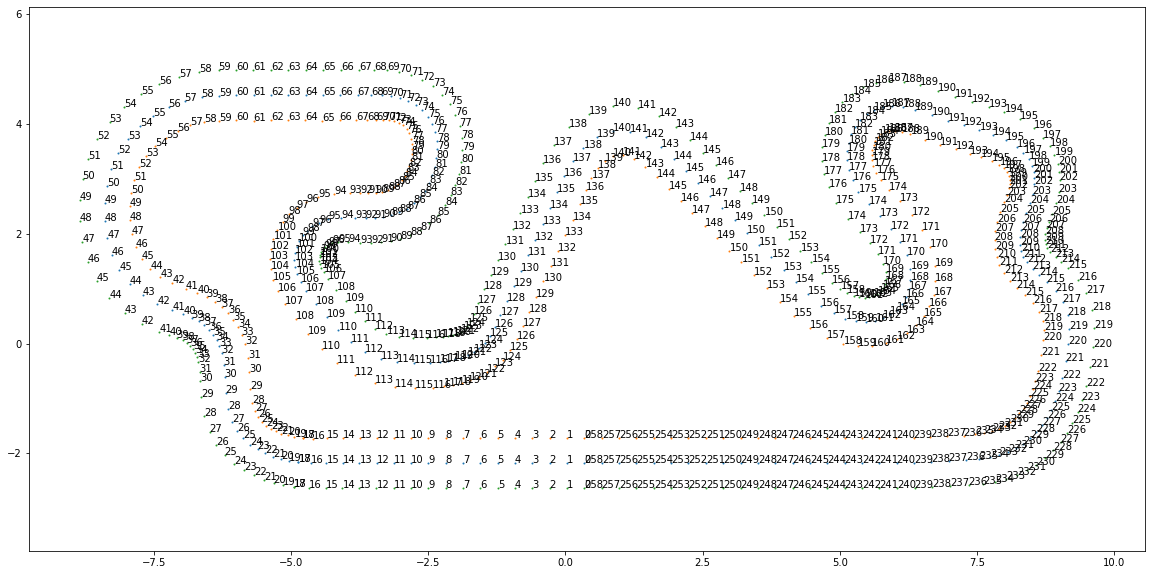

In [6]:
pu.plot_trackpoints(track)

In [7]:
stream_name = 'sim-wzt7cdnh189h' ## CHANGE This to your simulation application ID
fname = 'logs/deepracer-%s.log' %stream_name  # The log will be downloaded into the specified path

In [8]:
cw.download_log(fname, stream_prefix=stream_name)  # add force=True if you downloaded the file before but want to repeat

In [8]:
EPISODES_PER_ITERATION = 30 #  Set to value of your hyperparameter in training

data = slio.load_data(fname)
df = slio.convert_to_pandas(data, episodes_per_iteration=EPISODES_PER_ITERATION)

df = df.sort_values(['episode', 'steps'])

In [9]:
df

iteration  episode  steps       x       y       yaw  steer  throttle  \
0              1        0      3  0.1863 -2.1733 -179.9156   10.0       1.5   
1              1        0      4  0.1539 -2.1729  179.9769  -30.0       1.5   
2              1        0      5  0.1128 -2.1725  179.8379   20.0       1.5   
3              1        0      6  0.0673 -2.1716  179.5753  -30.0       1.5   
4              1        0      7 -0.0088 -2.1700  179.3637  -20.0       1.5   
...          ...      ...    ...     ...     ...       ...    ...       ...   
28292         17      499    120 -6.8423  0.8831  113.2049   10.0       1.5   
28293         17      499    121 -6.8972  0.9850  116.1885   30.0       1.5   
28294         17      499    122 -6.9456  1.0629  118.8501  -10.0       1.5   
28295         17      499    123 -7.0118  1.1531  123.2072   10.0       1.5   
28296         17      499    124 -7.0975  1.2535  128.4718   10.0       1.5   

       action  reward  done on_track  progress  closest_waypoint  track_len  \
0         4.0     1.0     0     True    0.2691                 1       60.0   
1         0.0     1.0     0     True    0.3231                 1       60.0   
2         5.0     1.0     0     True    0.3916                 1       60.0   
3         0.0     1.0     0     True    0.4675                 1       60.0   
4         1.0     1.0     0     True    0.5944                 1       60.0   
...       ...     ...   ...      ...       ...               ...        ...   
28292     4.0     1.0     0     True   20.0339                40       60.0   
28293     6.0     0.1     0    False   20.1793                40       60.0   
28294     2.0     0.1     0    False   20.3005                41       60.0   
28295     4.0     0.1     0    False   20.4933                41       60.0   
28296     4.0     0.1     1    False   20.6899                42       60.0   

                timestamp  
0      1590008443.7136934  
1      1590008443.7790956  
2      1590008443.8391883  
3      1590008443.9030972  
4      1590008443.9767385  
...                   ...  
28292   1590011922.082146  
28293  1590011922.1500614  
28294   1590011922.210485  
28295   1590011922.284179  
28296   1590011922.342834  

[28297 rows x 16 columns]

In [10]:
df['action'].value_counts().sort_index()

0.0    4724
1.0    5232
2.0    3869
3.0    3781
4.0    3020
5.0    3071
6.0    4600
Name: action, dtype: int64

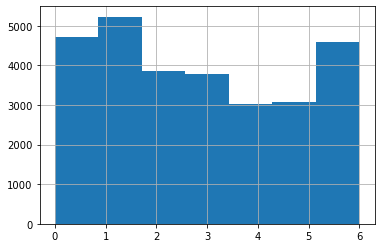

In [11]:
df['action'].hist(bins=7)

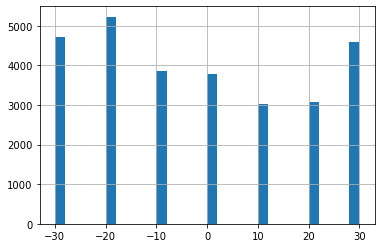

In [12]:
df['steer'].hist(bins=30)

In [13]:
len(track.center_line), df['closest_waypoint'].max()

(259, 258)

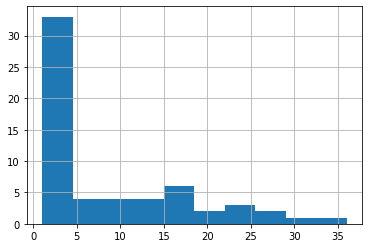

In [14]:
df[df['reward'] > 1]['reward'].hist()

In [15]:
def plot_track(t):
    ratio = (lambda x,y: x / y)(*t.size())
    fig = plt.figure(figsize=(16,16/ratio))
    ax = fig.add_subplot()
    ax.plot(*t.center_line.T, 'b')
    ax.plot(*t.outer_border.T, 'b')
    ax.plot(*t.inner_border.T, 'b')
    return ax

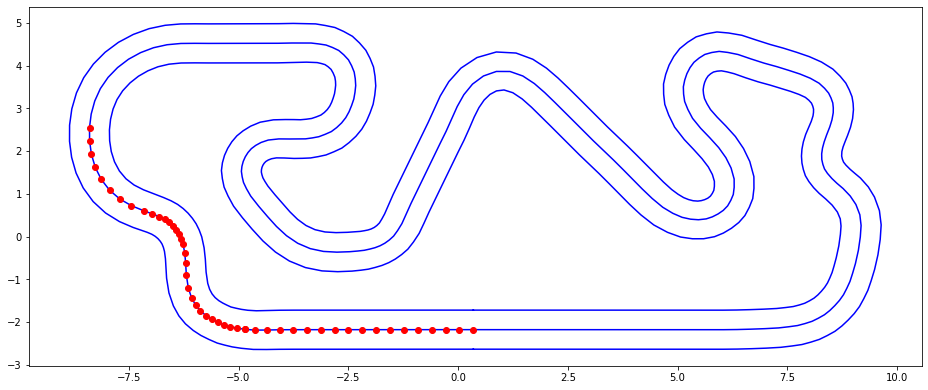

In [16]:
ax = plot_track(track)
ax.plot(*track.center_line[:50].T, 'ro')

In [24]:
key = lambda wpt: [int(round(c)) for c in wpt]
keys = np.array([key(w) for w in track.center_line])

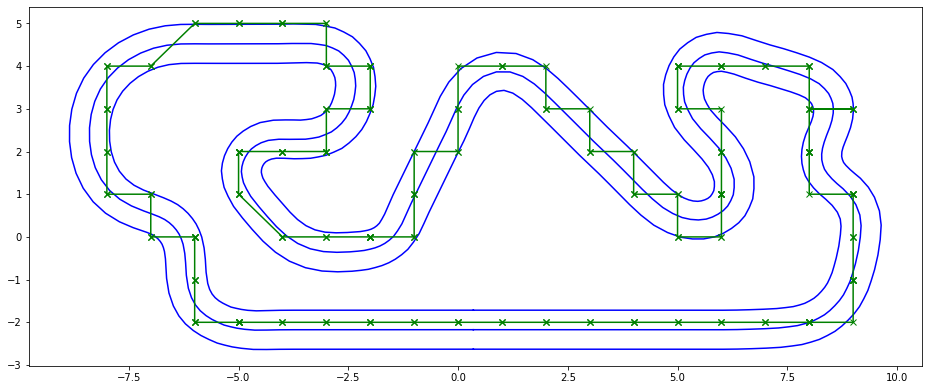

In [34]:
ax = plot_track(track)
ax.plot(*keys.T, 'gx-')

In [35]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'